In [1]:
import sys
import argparse

import torch
import pytorch_lightning as pl

sys.path.append('../')
from datasets.dist import Gaussian, GMM
from model.cnf import CNF, PhaseSpaceCNF
from utils.parsing import parse_phase_space_cnf_args

%load_ext autoreload
%autoreload 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 2D-CNF

In [ ]:
# Initialize source and target
args = argparse.Namespace(num_hidden_units = 16, 
                          num_timesteps = 25,
                          source = 'gaussian',
                          target = 'gmm',
                          target_nmode = 2)       

# Initialize flow
cnf = CNF(args)

# Train
trainer = pl.Trainer(min_epochs=1, max_epochs=1)
trainer.fit(cnf)

In [ ]:
# Alternatively, load a flow
cnf = CNF.load_from_checkpoint('../workdir/cnf_gmm_pentamodal0.ckpt')
cnf.eval()

In [ ]:
cnf.data_loss(N=10000)

In [ ]:
cnf.graph_marginals(num_marginals=10)

In [ ]:
cnf.graph_backwards_marginals(num_marginals=10)

In [ ]:
cnf.reverse_kl(num_timesteps=60)

## Phase Space CNF

In [ ]:
# Initialize source and target
args = parse_phase_space_cnf_args(['--target=gaussian'])  

# Initialize flow
cnf = PhaseSpaceCNF(args)

# Train
trainer = pl.Trainer(min_epochs=10, max_epochs=10)
trainer.fit(cnf)

In [14]:
# Alternatively, load a trained model
cnf = PhaseSpaceCNF.load_from_checkpoint('../workdir/verlet_bimodal0.ckpt')

Flow is : VerletFlow(
  (_q_vp_net): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): SELU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): SELU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): SELU()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
  (_q_nvp_net): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): SELU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): SELU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): SELU()
    (6): Linear(in_features=16, out_features=4, bias=True)
  )
  (_p_vp_net): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): SELU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): SELU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): SELU()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
  (_p_nvp_net): Sequential

In [ ]:
from matplotlib import pyplot as plt
x = cnf.target_set.sample(100000).detach().cpu().numpy()
plt.hist2d(x[:,2], x[:,3], density=True, bins=100)
plt.show()

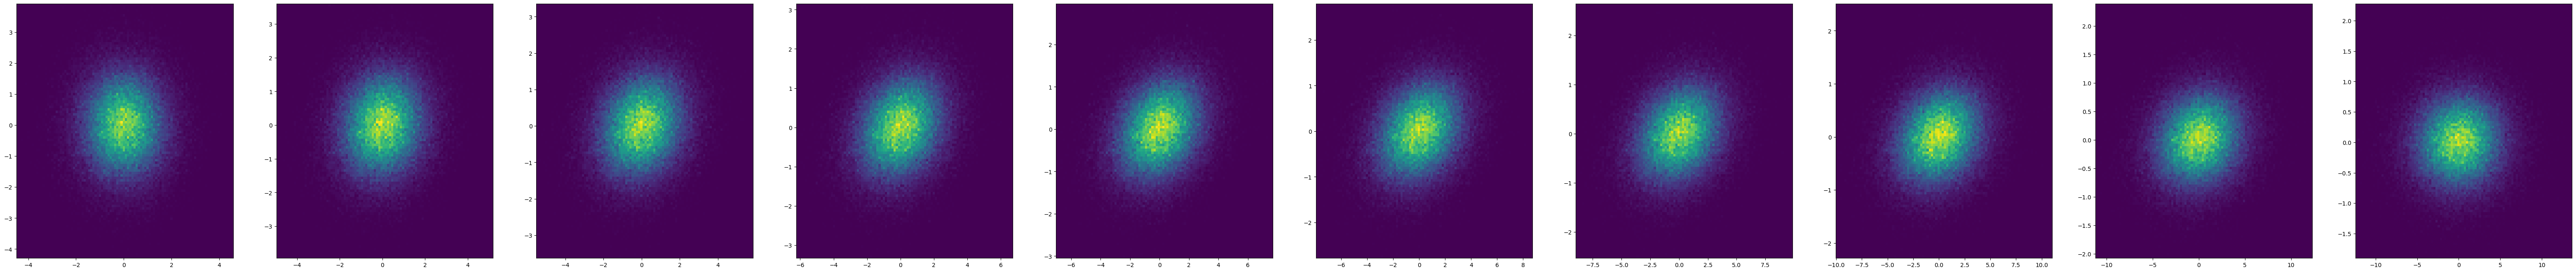

In [17]:
cnf.graph_marginals(num_marginals=10, N=100000)

In [ ]:
cnf.graph_backwards_marginals(num_marginals=10, N=300000)

In [16]:
cnf.reverse_kl()

tensor(7.5229, grad_fn=<MeanBackward0>)